<a href="https://colab.research.google.com/github/Raindeeru/ArawGonzales-DataScienceThree-SA2/blob/main/ArawGonzales_SA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SA 2: Implementing Yolo

# Installing Ultralytics

In [ ]:
!pip install jupyterlab ultralytics
# Here we install ultralytics in the Google Colab runtime environment.
# Ultralytics contains all the different YOLO models, in our case we will use basic object detection (Ultralytics, 2026; Kokalj, 2026).

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
# The pandas library is also accessed for this project. It is used by the author to read the .csv files where all data will come from and
# to perform DataFrame manipulation throughout the analysis.
from ultralytics import YOLO
# Here we import the core YOLO engine provided by Ultralytics.
# What we imported specifically allows for model initialization and weight loading (Ultralytics, 2026; Kokalj, 2026).
import os
# Here we import the os module which provides functions to interact with the operating system.
# We use it here to check if the file exists
import matplotlib.pyplot as plt
# Here we import matplotlib the standard library for creating visualizations.
# We use it to handles the rendering of the YOLO result images.



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
# Here import google colab's drive module to allow us to connect to our account's Google Drive.
# This will allow us to get the dataset and to save data even across different runtimes.
drive.mount('/content/drive')
# This line connects the drive as a folder available in our runtime.
# The parameter provided will be the folder in our runttime that will contain the Google Drive files

Mounted at /content/drive


# Initialization



In [ ]:
DATA = '/content/drive/MyDrive/Araw_Gonzales_Merged/data.yaml'
# Here we initialized the path to the data.yaml of the dataset.
# Notice this is the absolute path with the root being the root of the Colab's runtime

In [ ]:
hyperparams = [
    {
        'name': 'Model1',
        # Here we specify the model name.
        # This will be the name of the folder where YOLO will store its output data
        'epochs': 25,
        # Here we specificy the number of epochs.
        # This will determine the maximum number of iterations YOLO take to run.
        'imgsz': 640,
        # Here we provide the size of the image N x N.
        # Note that the image size is assumed to be a square.
        'optimizer': 'AdamW',
        # Here we provide the type of optimizer that YOLO will use when training.
        # The type of optimizer used will affect how the weights change and how quickly they converge
        # (Amit, 2024).
        'batch': 4,
        # Here we determine the number of images for every batch.
        # The batch size determines how many images per run YOLO will process.
        'lr0': 0.01
        # Here we define the learning rate of our model.
        # Learning rate defines how large of a step the weights move at every iteration.
        # A smaller learning rate means a finer step ().
    },
    {
        'name': 'Model2',
        # Here we specify the model name.
        # This will be the name of the folder where YOLO will store its output data
        'epochs': 30,
        # Here we specificy the number of epochs.
        # This will determine the maximum number of iterations YOLO take to run.
        'imgsz': 640,
        # Here we provide the size of the image N x N.
        # Note that the image size is assumed to be a square.
        'optimizer': 'SGD',
        # Here we provide the type of optimizer that YOLO will use when training.
        # The type of optimizer used will affect how the weights change and how quickly they converge.
        'batch': 20,
        # Here we determine the number of images for every batch.
        # The batch size determines how many images per run YOLO will process.
        'lr0': 0.001
        # Here we define the learning rate of our model.
        # Learning rate defines how large of a step the weights move at every iteration.
        # A smaller learning rate means a finer step.
    },
    {
        'name': 'Model3',
        # Here we specify the model name.
        # This will be the name of the folder where YOLO will store its output data
        'epochs': 40,
        # Here we specificy the number of epochs.
        # This will determine the maximum number of iterations YOLO take to run.
        'imgsz': 640,
        # Here we provide the size of the image N x N.
        # Note that the image size is assumed to be a square.
        'optimizer': 'auto',
        # Here we provide the type of optimizer that YOLO will use when training.
        # The type of optimizer used will affect how the weights change and how quickly they converge.
        'batch': -1,
        # Here we determine the number of images for every batch.
        # The batch size determines how many images per run YOLO will process.
        'lr0': 0.0001
        # Here we define the learning rate of our model.
        # Learning rate defines how large of a step the weights move at every iteration.
        # A smaller learning rate means a finer step.
    }
]
# Here we provided a set of hyper parameters to be used per run of the model.
# For each run we change the number of  epochs, the optimizer, the batch size and the learning rate.

In [ ]:
pd.DataFrame(hyperparams)
# Here we present the set of Hyperparameters as a Pandas dataframe.
# As you can see at each model we increase the epochs, change the optimizer, and reduce the learning rate.
# In the third model we let YOLO decide which optimizer to use, and how large the batch size will be, indicated by a -1 for batch.

,name,epochs,imgsz,optimizer,batch,lr0
0,Model1,25,640,AdamW,4,0.0100
1,Model2,30,640,SGD,20,0.0010
2,Model3,40,640,auto,-1,0.0001


In [ ]:
metrics_list = []
# Here we initialize an empty array for the metrics list.
# After every single model, we will be adding the data

# Training

In [ ]:
model1 = YOLO("yolo26n.pt")
# Here we first initialize the YOLO model with YOLOv26 nano size.
# The standard model for YOLO is good for object detection, which is our particular use case

results1 = model1.train(
    data=DATA,
    epochs=hyperparams[0]['epochs'],
    imgsz=hyperparams[0]['imgsz'],
    optimizer=hyperparams[0]['optimizer'],
    batch=hyperparams[0]['batch'],
    lr0=hyperparams[0]['lr0'],
    name=hyperparams[0]['name'],
)
# In this line we start training the model using the built in train function provided.
# We provide the path to the data through the path we specified, and loaded in the hyperparameters for that specific model.

val_results = model1.val()
# In this line we store the results in a variable.
# This variable will contain all data, curves, and the confusion matrix for the entire training of the model.

metrics_list.append({
    'mAP50': val_results.results_dict['metrics/mAP50(B)'],
    # This is the mean Average Precision at an IoU threshold of 0.50.
    # It represesents the average precision when the overlap of the predicting bounding box is at 50% of the actual true box.
    'Precision': val_results.results_dict['metrics/precision(B)'],
    # This stores the precision.
    # Precision is the ratio of true positives, across all detective positives.
    'Recall': val_results.results_dict['metrics/recall(B)'],
    # This stores the Recall.
    # Precision is the ratio of true positives, across all actual positives.
    'F1': 2 * (val_results.results_dict['metrics/precision(B)'] * val_results.results_dict['metrics/recall(B)']) /
          (val_results.results_dict['metrics/precision(B)'] + val_results.results_dict['metrics/recall(B)'] + 1e-9)
    # This stores the F1 score.
    # We use the formula for the harmonic mean here using the precision and the recall.
})
# In this line we append the data to the metrics list array.
# We will use this data later to present a table of the metrics. The data will be for validating the model and extracting
# mAP50, Precision, Recall, and F1 metrics using YOLO evaluation principles to evaluate the performance of the
# object detection model (Bochkovskiy et al., 2020).


Old cache files removed.
Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Araw_Gonzales_Merged/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=Model12, nbs=64, nms=False, opset=None, optimize=False, optimizer=

In [ ]:
model2 = YOLO("yolo26n.pt")
# Here we first initialize the YOLO model with YOLOv26 nano size.
# The standard model for YOLO is good for object detection, which is our particular use case

results2 = model2.train(
    data=DATA,
    epochs=hyperparams[1]['epochs'],
    imgsz=hyperparams[1]['imgsz'],
    optimizer=hyperparams[1]['optimizer'],
    batch=hyperparams[1]['batch'],
    lr0=hyperparams[1]['lr0'],
    name=hyperparams[1]['name'],
)
# In this line we start training the model using the built in train function provided.
# We provide the path to the data through the path we specified, and loaded in the hyperparameters for that specific model.

val_results = model2.val()
# In this line we store the results in a variable.
# This variable will contain all data, curves, and the confusion matrix for the entire training of the model

metrics_list.append({
    'mAP50': val_results.results_dict['metrics/mAP50(B)'],
    # This is the mean Average Precision at an IoU threshold of 0.50.
    # It represesents the average precision when the overlap of the predicting bounding box is at 50% of the actual true box.
    'Precision': val_results.results_dict['metrics/precision(B)'],
    # This stores the precision.
    # Precision is the ratio of true positives, across all detective positives.
    'Recall': val_results.results_dict['metrics/recall(B)'],
    # This stores the Recall.
    # Precision is the ratio of true positives, across all actual positives.
    'F1': 2 * (val_results.results_dict['metrics/precision(B)'] * val_results.results_dict['metrics/recall(B)']) /
          (val_results.results_dict['metrics/precision(B)'] + val_results.results_dict['metrics/recall(B)'] + 1e-9)
    # This stores the F1 score.
    # We use the formula for the harmonic mean here using the precision and the recall.
})

Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=20, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Araw_Gonzales_Merged/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=Model2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, 

In [ ]:
model3 = YOLO("yolo26n.pt")
# Here we first initialize the YOLO model with YOLOv26 nano size.
# The standard model for YOLO is good for object detection, which is our particular use case

results3 = model3.train(
    data=DATA,
    epochs=hyperparams[2]['epochs'],
    imgsz=hyperparams[2]['imgsz'],
    optimizer=hyperparams[2]['optimizer'],
    batch=hyperparams[2]['batch'],
    lr0=hyperparams[2]['lr0'],
    name=hyperparams[2]['name'],
)
# In this line we start training the model using the built in train function provided.
# We provide the path to the data through the path we specified, and loaded in the hyperparameters for that specific model.

val_results = model3.val()
# In this line we store the results in a variable.
# This variable will contain all data, curves, and the confusion matrix for the entire training of the model

metrics_list.append({
    'mAP50': val_results.results_dict['metrics/mAP50(B)'],
    # This is the mean Average Precision at an IoU threshold of 0.50.
    # It represesents the average precision when the overlap of the predicting bounding box is at 50% of the actual true box.
    'Precision': val_results.results_dict['metrics/precision(B)'],
    # This stores the precision.
    # Precision is the ratio of true positives, across all detective positives.
    'Recall': val_results.results_dict['metrics/recall(B)'],
    # This stores the Recall.
    # Precision is the ratio of true positives, across all actual positives.
    'F1': 2 * (val_results.results_dict['metrics/precision(B)'] * val_results.results_dict['metrics/recall(B)']) /
          (val_results.results_dict['metrics/precision(B)'] + val_results.results_dict['metrics/recall(B)'] + 1e-9)
    # This stores the F1 score.
    # We use the formula for the harmonic mean here using the precision and the recall.
})

Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Araw_Gonzales_Merged/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=Model3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True

# Results

In [ ]:
!cp -r /content/runs /content/drive/MyDrive/
# Here we copy the entire runs folder to the Drive
# We do this so that we can check the results even after the runtime has ended

,mAP50,Precision,Recall,F1
0,0.399066,0.537185,0.385769,0.449057
1,0.294735,0.406872,0.329764,0.364282
2,0.440748,0.546305,0.427367,0.479572


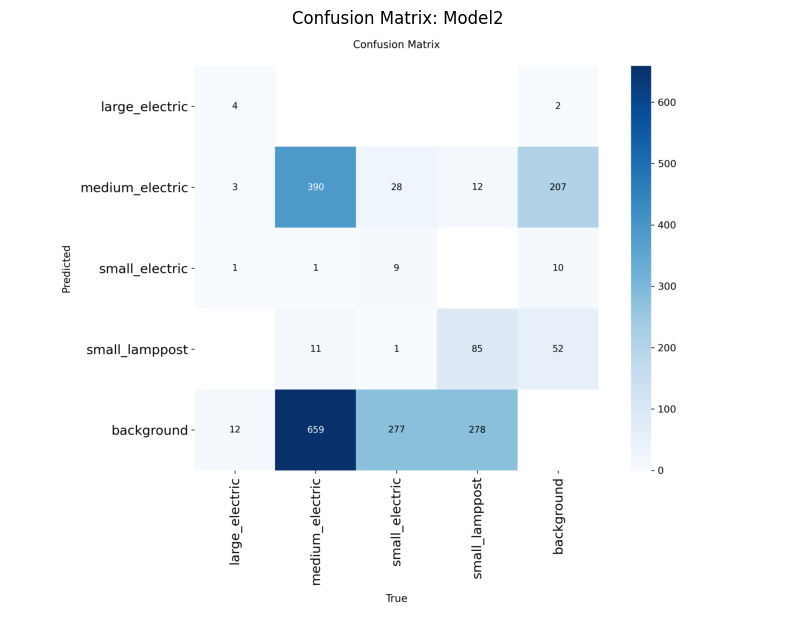

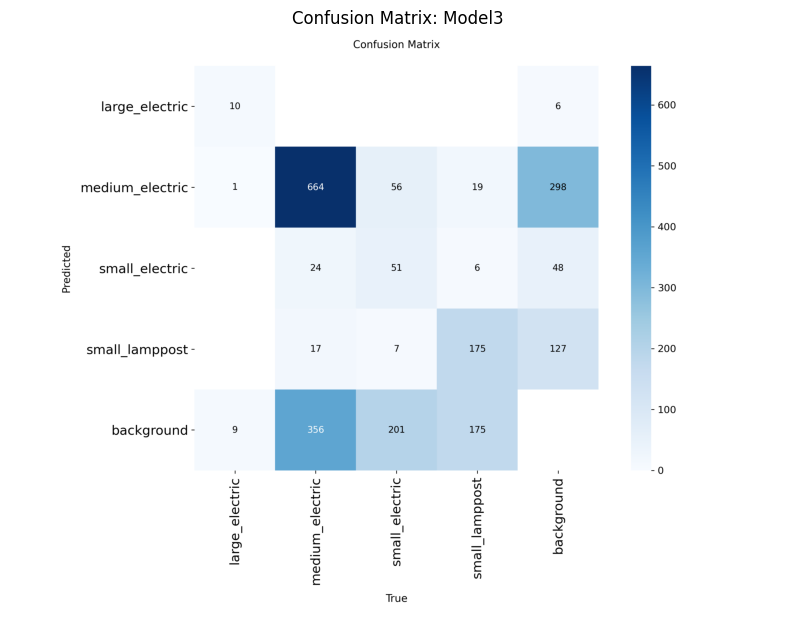

In [ ]:
df_metrics = pd.DataFrame(metrics_list)
# Convert the list of experiment results into a pandas table.
# We do this to turn the raw metrics into an easy-to-read format
display(df_metrics)
# This line outputs the table to the notebook interface
# This allows for immediate comparison of performance across different hyperparameter sets

for p in hyperparams:
# We loop through each dictionary in the hyperparameters list.
# We do this to ensures every training variation is processed for visualization

    cm_path = f"/content/drive/MyDrive/runs/detect/{p['name']}/confusion_matrix.png"
    # Next we define the specific path to the saved confusion matrix on Drive.
    # This dynamically points to the 'runs' folder for each unique run name

    if os.path.exists(cm_path):
    # Then we verify the image exists before attempting to open it.
    # Acts as error handling to skip runs that haven't finished or were interrupted

        plt.figure(figsize=(10, 8))
        # Next we create a new plotting figure with defined dimensions.
        # This ensures the matrix is large enough to read the class labels clearly

        img = plt.imread(cm_path)
        # Then we read the PNG image data into a format Matplotlib can use.
        # This pulls the visual training evidence from your Google Drive

        plt.imshow(img)
        # This line plots the image data on the current figure.
        # This will display the grid showing where the model is confusing different object classes

        plt.title(f"Confusion Matrix: {p['name']}")
        # Next we label the plot with the name of the current experiment.
        # We do this to make it clearer which hyperparameter settings produced these results

        plt.axis('off')
        # Next we remove the axis ticks and numerical pixel markers.
        # This just cleans up the visual so it looks like a standard report graphic

        plt.show()
        # Finally we use plt.show to force the plot to render and clear for the next loop.
        # This prevents multiple confusion matrices from overlapping in a single output

In [ ]:
pd.DataFrame(hyperparams).to_csv("/content/drive/MyDrive/Araw_Gonzales_Merged/params.csv")
# Right ater acquiring our validation results and generating the confusion matrices, we execute the line above.
# It converts the hyperparameter configurations into a structured DataFrame and saves them as a CSV file for proper documentation of the
# experimental setup.

pd.DataFrame(metrics_list).to_csv("/content/drive/MyDrive/Araw_Gonzales_Merged/metrics.csv")
# We execute this line to convert the collected evaluation results of mAP50, Precision, Recall, and F1 Score, into a Dataframe. We
# then also save it as a CSV file for the structured comparison and discussion analysis of the project.

#Discussion of Results for the Electric Pole Detection Model using YOLOv26

## Overview of the Results

The initial data shows a relatively poor score across the defined metrics, in particular, Mean Average Precision at an IoU of 50%, Precision, Recall, and F1 score.

Below is the summary table of results from the three models trained on the data.

| Model   | mAP50     | Precision  | Recall     | F1        |
|---------|----------|------------|-----------|-----------|
| Model 1 | 39.9066% | 53.7185%   | 38.5769%  | 44.9057%  |
| Model 2 | 29.4735% | 40.6872%   | 32.9764%  | 36.4282%  |
| Model 3 | 44.0748% | 54.6305%   | 42.7367%  | 47.9572%  |

As per the results above, the best-performing model is the third model across all three metrics. The difference can be attributed to the fact that in the third model, the batch size and the optimizer were automatically determined by the model. As per the documentation, batch size was optimized to use 60% of the GPU, and the optimizer was chosen based on the configuration.

A smaller learning rate could also be attributed to the higher metrics, manifesting as smaller and finer steps per iteration of the model, which allowed it to converge faster.

The SGD optimizer, however, performed somewhat poorly within the 30 epochs it was allowed to run. Noticeably improving much slower per epoch.

However, the pitfalls and the inaccuracies of the model are still prevalent, as the results are obviously still enough to justify deployment in actual systems. This is mainly the result of the image quality of the dataset. These limitations will be further discussed in the per-class discussion of the results.

## Results per Model and per Class

Above are the normalized confusion matrices for each of the models. The normalized matrix scales the magnitude of the cells in the matrix by the number of total instances per class. As compared to a normal confusion matrix, which counts the absolute number of instances, the normalized matrix records the ratio.

### Model 1
Model 1, which uses the Adam optimizer, while not particularly great, still shows signs that it somewhat captured the features of the objects. Most of the objects detected are background (which will be discussed further later), and are the particular problem in this dataset. Out of all the classes, the only classes that it predicts correctly more often than not are large electric poles and small lampposts.

### Model 2
Model 2, despite the finer learning rate uses the SGD Optimizer, which, during training, converges much more slowly than Adam, and this shows in the results. While yes, like Model 1, it mostly predicts background objects, it is far worse than Model 1 in that regard.
### Model 3
Model 3 allowed YOLO to choose an optimizer for it; it also had the smallest learning rate and allowed for an automatic batch size. As a result of this, it gave the best results. While ,like the other models, it predicted a lot in the background it is by far the best in terms of the ratio of true positives.

Next, we will explore and try to give an explanation to the results found in the results for each class.


Because the results are far better for Model 3, we will refer to that model going forward.  
To further help with comparisons, below are the validation results for mAP50 for each class for the third model.

| Class            | mAP50    | Instances |
|------------------|----------|-----------|
| All              | 44.1%    | 1771      |
| Large Electric   | 52.9%    | 20        |
| Medium Electric  | 58.2%    | 1061      |
| Small Electric   | 18.2%    | 315       |
| Small Lamppost   | 46.9%    | 375       |

### Background

While this is not a class defined in the dataset per se, understanding the model in terms of its background predictions is important in understanding how our model failed.

Looking at the confusion matrix, a sizable chunk of our model's predictions are just background artifacts. This represents a lot of false negatives within our dataset, which is indicative of a lower recall.

This could possibly be a reflection of the lower resolution data that we provided, adding more chances that the model misinterprets pixels; for example, an electric pole may just be interpreted as a blurry streak and be added to the background class.

### Large Electric

Around half of the large electric poles were correctly identified. With the other half mainly consisting of predictions on the background, and a small fraction being predictions for medium electric poles. By far, the support of this class is the smallest among all the other classes.

While measures were taken to improve the imbalances within the class, it is unavoidable to include fewer large electric poles without the risk of oversampling, and thus overfitting, because there are simply fewer large electric poles in general as compared to the other types. Surprisingly, however, this is actually one of the better-predicted classes, which could be attributed to the more distinct shape that large electric poles have.

### Medium Electric

Medium electric poles constitute the vast majority of our dataset; in the validation dataset alone, 1000 of the almost 1800 instances were assigned to them.

This, for our particular data, made sense as the videos we collected mostly drove through major thoroughfares, which consist mostly of medium-sized electric poles.

However, this is susceptible to problems of class imbalance; if the model just decides to label something as a medium electric pole, it will statistically be correct more of the time.

This is somewhat reflected in our results, where a large portion of predictions for medium electric poles are actually just background artifacts. Around 60 percent of the actual background instances are just mispredictions of the medium electric poles. What is good, however, is that the model does not seem to mislabel a lot of the other classes, with it mostly just mislabelling it to be a background artifacts as mentioned.

### Small Electric

Small electric poles perform by far the worst in terms of all the metrics provided. In the confusion matrix, a majority of actual electric poles are predicted as the background, with only 16 percent being correctly identified.

It can also be observed that the model does not seem to prefer predicting something to be a small electric pole, with it constituting a minority of the predictions. Even though it has a comparable number of instances with small lampposts (which does far better than this class).

An explanation for this discrepancy is the sheer variations of small electric poles. A lot of small electric poles could be small wooden poles, metal pipes, or concrete posts; more often than not they could be angled differently. Also, the fact that a lot of different items on the street can be mistaken for this, trees, fences, flags, etc.

Essentially, compared to the other classes, there are far more variations in what a small electric pole could look like, and a lot of different things could look like a small electric pole, and as such, the model struggles to actually detect these objects.

### Small Lamppost

Lastly, almost half of all small lampposts were correctly identified by our models, achieving an accuracy of 46.9% and placing their class identification rate above the average of all class. Out of the 375 instances, 176 of them were properly recognized.

The models often confuse the small lamppost with either a medium electric post, small electric post, or the background. With the annotation processes performed with the inclusion of distant figures in the road camera, we infer that size and color are major factors affecting the model’s ability to correctly distinguish between these classes (excluding the background). Any thin or distant vertical figure is sometimes classified as a small lamppost, which explains why the background is the most frequent misclassification (0.27) compared to medium and small electric posts (both 0.2).

However, the model’s performance in detecting small lampposts looks promising. The 176 correctly identified instances were most likely identified due to favorable conditions such as clear visibility of the lamppost’s structure, contrast against the background, and sufficient lighting (Zhao et al., 2019). For example, in some parts of the training dataset taken under low-light conditions (dusk), the lampposts stand out more than the electric posts, explaining how effectively the models capture the features of small lampposts.

# References

- Amit, H. (2024, December 2). Stochastic Gradient Descent (SGD) and Adam. Medium. https://medium.com/data-scientists-diary/stochastic-gradient-descent-sgd-and-adam-4fe496ef1bbf
- Bochkovskiy, A., Wang, C., & Liao, H. M. (2020, April 23). YOLOV4: Optimal speed and accuracy of object detection. arXiv.org. https://arxiv.org/abs/2004.10934
- Kokalj, E. (2026, January 16). Train a YOLO26 Instance Segmentation Model with Custom Data. Roboflow Blog. https://blog.roboflow.com/train-yolo26-instance-segmentation-custom-data/
- Ultralytics. (2026, January 20). Ultralytics YOLO Hyperparameter Tuning Guide. Ultralytics YOLO Docs. https://docs.ultralytics.com/guides/hyperparameter-tuning/#default-search-space-description
- Zhao, Z., Zheng, P., Xu, S., & Wu, X. (2019). Object Detection with Deep Learning: A review. IEEE Transactions on Neural Networks and Learning Systems, 30(11), 3212–3232. https://doi.org/10.1109/tnnls.2018.2876865